# K-Means

---

## Table of Contents
1. Defined
2. Implimentation
3. Comparison

<br />

---


## Implimentation


In [1]:
# IMPORTS

import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
class KMeans:
    def __init__(self, k_clusters = 2):
        self.k_clusters = k_clusters

    def _classify(self, centers, x_i):
        return np.argmin(np.linalg.norm(centers - np.array(x_i), axis = 1))

    def fit(self, X):
        self.X = X

        self.centers = np.array(random.sample(list(self.X), self.k_clusters))

        # Testing variable for if new_cluster = old_cluster
        test = True

        old_cluster = None

        while test:
            new_cluster = [self._classify(self.centers, x) for x in X]

            if new_cluster == old_cluster: test = False

            old_cluster = new_cluster

            for i in range(self.k_clusters):
                index = np.where(np.array(new_cluster) == i) 
                self.centers[i] = np.mean(X[index], axis = 0)


        return self.centers

    def plot(self, y = None, actual_y = None):
        X = self.X.T

        if y == None:
            for i in range(len(X[0])):
                plt.scatter(X[:, i][0], X[:, i][1])
        else:
            for i in range(len(X[0])):
                if (actual_y[i] == 1):
                    plt.scatter(X[:, i][0], X[:, i][1], color="green") 
                else:
                    plt.scatter(X[:, i][0], X[:, i][1], color="blue")

        plt.scatter(self.centers[0][0], self.centers[0][1], color="red", s=200)
        plt.scatter(self.centers[1][0], self.centers[1][1], color="red", s=200)
        plt.show()

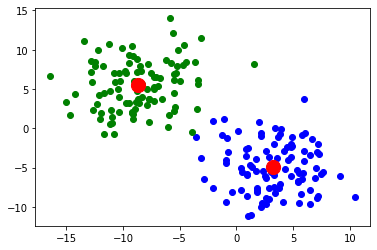

In [3]:
# FIT

X, Y = make_blobs(n_samples = 200, centers = 2, cluster_std = 3)

model = KMeans()
model.fit(X)
model.plot(actual_y = Y, y = 1)